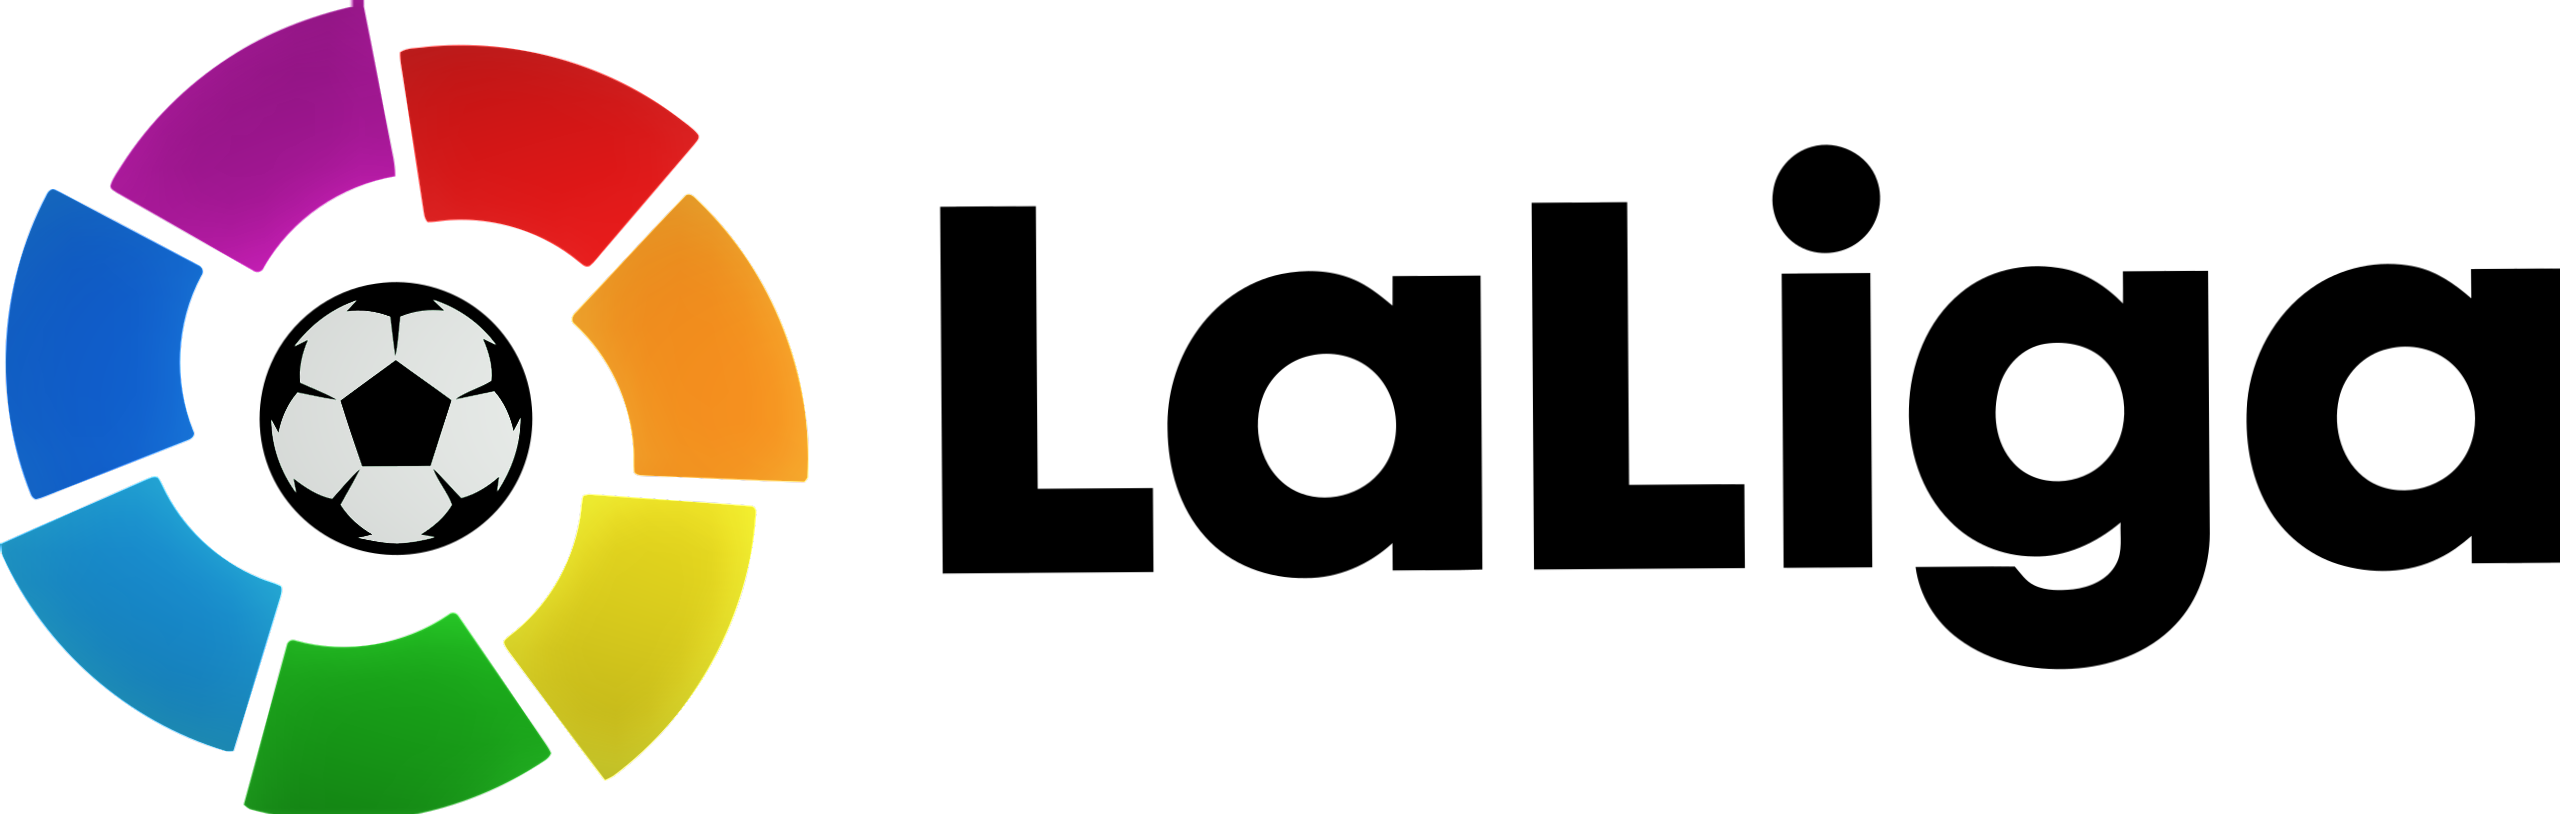

###Importing Needed packages

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

### web scraping

In [ ]:
# URL of scraping 
url ="https://fbref.com/en/comps/12/La-Liga-Stats"

In [ ]:
data = requests.get(url)

In [ ]:
# extract html of the page
soup = BeautifulSoup(data.text)
standing_table = soup.select('table.stats_table')[0]
standing_table 

<table class="stats_table sortable min_width" data-cols-to-freeze=",2" id="results2022-2023121_overall"> <caption>League Table Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class=" poptip center" data-stat="rank" data-tip="Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class=" poptip center" data-stat="team" scope="col">Squad</th> <th aria-label="Matches Played" class=" poptip center" data-stat="games" data-tip="Matches Played by the playe

In [ ]:
# collect the link of squads
links = standing_table.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if '/squads/' in l]
links

['/en/squads/53a2f082/Real-Madrid-Stats',
 '/en/squads/206d90db/Barcelona-Stats',
 '/en/squads/fc536746/Real-Betis-Stats',
 '/en/squads/2b390eca/Athletic-Club-Stats',
 '/en/squads/03c57e2b/Osasuna-Stats',
 '/en/squads/2a8183b3/Villarreal-Stats',
 '/en/squads/db3b9613/Atletico-Madrid-Stats',
 '/en/squads/e31d1cd9/Real-Sociedad-Stats',
 '/en/squads/dcc91a7b/Valencia-Stats',
 '/en/squads/2aa12281/Mallorca-Stats',
 '/en/squads/9024a00a/Girona-Stats',
 '/en/squads/98e8af82/Rayo-Vallecano-Stats',
 '/en/squads/f25da7fb/Celta-Vigo-Stats',
 '/en/squads/7848bd64/Getafe-Stats',
 '/en/squads/ad2be733/Sevilla-Stats',
 '/en/squads/78ecf4bb/Almeria-Stats',
 '/en/squads/a8661628/Espanyol-Stats',
 '/en/squads/17859612/Valladolid-Stats',
 '/en/squads/ee7c297c/Cadiz-Stats',
 '/en/squads/6c8b07df/Elche-Stats']

In [ ]:
# complete the link to be working
team_urls = [f"https://fbref.com{l}" for l in links]

In [ ]:
data = requests.get(team_urls[0])
data

<Response [200]>

In [ ]:
matches = pd.read_html(data.text,match="Scores & Fixtures")[0]
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2022-08-10,22:00,Super Cup,UEFA Super Cup,Wed,Home,W,2.0,0.0,de Eint Frankfurt,NaN,NaN,58.0,31042.0,Karim Benzema,4-3-3,Michael Oliver,Match Report,NaN
1,2022-08-14,22:00,La Liga,Matchweek 1,Sun,Away,W,2.0,1.0,Almería,2.4,0.6,67.0,14386.0,Karim Benzema,4-3-3,Juan Martínez,Match Report,NaN
2,2022-08-20,22:00,La Liga,Matchweek 2,Sat,Away,W,4.0,1.0,Celta Vigo,3.4,1.3,50.0,15681.0,Karim Benzema,4-3-3,Jesús Gil,Match Report,NaN
3,2022-08-28,22:00,La Liga,Matchweek 3,Sun,Away,W,3.0,1.0,Espanyol,1.6,1.1,65.0,25778.0,Karim Benzema,4-3-3,Mario Melero,Match Report,NaN
4,2022-09-03,16:15,La Liga,Matchweek 4,Sat,Home,W,2.0,1.0,Betis,2.6,0.5,49.0,58579.0,Karim Benzema,4-3-3,José Sánchez,Match Report,NaN
5,2022-09-06,20:00,Champions Lg,Group stage,Tue,Away,W,3.0,0.0,sct Celtic,2.5,1.1,64.0,57057.0,Karim Benzema,4-3-3,Sandro Schärer,Match Report,NaN
6,2022-09-11,14:00,La Liga,Matchweek 5,Sun,Home,W,4.0,1.0,Mallorca,1.6,0.4,68.0,54816.0,Toni Kroos,4-3-3,Jorge Figueroa,Match Report,NaN
7,2022-09-14,21:00,Champions Lg,Group stage,Wed,Home,W,2.0,0.0,de RB Leipzig,1.4,0.5,52.0,54289.0,Nacho,4-3-3,Maurizio Mariani,Match Report,NaN
8,2022-09-18,21:00,La Liga,Matchweek 6,Sun,Away,W,2.0,1.0,Atlético Madrid,0.9,1.0,46.0,66881.0,Luka Modrić,4-3-3,José Luis Munuera,Match Report,NaN
9,2022-10-02,21:00,La Liga,Matchweek 7,Sun,Home,NaN,NaN,NaN,Osasuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN


In [ ]:
# Collect the links
soup = BeautifulSoup(data.text)
links = soup.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if l and 'all_comps/shooting/' in l]

In [ ]:
data = requests.get(f"https://fbref.com{links[0]}")

In [ ]:
shooting = pd.read_html(data.text, match="Shooting")[0]
shooting.head()

For Real Madrid                                                            \
             Date   Time       Comp           Round  Day Venue Result GF GA   
0      2022-08-10  22:00  Super Cup  UEFA Super Cup  Wed  Home      W  2  0   
1      2022-08-14  22:00    La Liga     Matchweek 1  Sun  Away      W  2  1   
2      2022-08-20  22:00    La Liga     Matchweek 2  Sat  Away      W  4  1   
3      2022-08-28  22:00    La Liga     Matchweek 3  Sun  Away      W  3  1   
4      2022-09-03  16:15    La Liga     Matchweek 4  Sat  Home      W  2  1   

                      ... Standard               Expected                    \
            Opponent  ...     Dist   FK PK PKatt       xG npxG npxG/Sh G-xG   
0  de Eint Frankfurt  ...      NaN  NaN  0     0      NaN  NaN     NaN  NaN   
1            Almería  ...     17.9  1.0  0     0      2.4  2.4    0.09 -0.4   
2         Celta Vigo  ...     18.7  0.0  1     2      3.4  1.9    0.13  0.6   
3           Espanyol  ...     15.6  1.0  0     0      1.6  1.6    0.08  1.4   
4              Betis  ...     17.2  2.0  0     0      2.6  2.6    0.12 -0.6   

          Unnamed: 25_level_0  
  np:G-xG        Match Report  
0     NaN        Match Report  
1    -0.4        Match Report  
2     1.1        Match Report  
3     1.4        Match Report  
4    -0.6        Match Report  

[5 rows x 26 columns]

In [ ]:
# drop the top index level of the table
shooting.columns = shooting.columns.droplevel()

In [ ]:
# merge two tables latches and shooting
team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2022-08-10,22:00,Super Cup,UEFA Super Cup,Wed,Home,W,2.0,0.0,de Eint Frankfurt,...,4-3-3,Michael Oliver,Match Report,NaN,0,0,NaN,NaN,0,0
1,2022-08-14,22:00,La Liga,Matchweek 1,Sun,Away,W,2.0,1.0,Almería,...,4-3-3,Juan Martínez,Match Report,NaN,29,15,17.9,1.0,0,0
2,2022-08-20,22:00,La Liga,Matchweek 2,Sat,Away,W,4.0,1.0,Celta Vigo,...,4-3-3,Jesús Gil,Match Report,NaN,15,6,18.7,0.0,1,2
3,2022-08-28,22:00,La Liga,Matchweek 3,Sun,Away,W,3.0,1.0,Espanyol,...,4-3-3,Mario Melero,Match Report,NaN,19,6,15.6,1.0,0,0
4,2022-09-03,16:15,La Liga,Matchweek 4,Sat,Home,W,2.0,1.0,Betis,...,4-3-3,José Sánchez,Match Report,NaN,22,5,17.2,2.0,0,0


In [ ]:
# years of the study
years = list(range(2023,2019, -1))

In [ ]:
all_matches=[]
standings_url="https://fbref.com/en/comps/12/La-Liga-Stats"

In [ ]:
# loop to collect all the data between 2023 and 2019

for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0]

    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text)
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/shooting/' in l]
        data = requests.get(f"https://fbref.com{links[0]}")
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()
        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue
        team_data = team_data[team_data["Comp"] == "La Liga"]
        
        team_data["Season"] = year
        team_data["Team"] = team_name
        all_matches.append(team_data)
        time.sleep(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
len(all_matches)

80

In [ ]:
# Concatenate all matches in the database
match_df = pd.concat(all_matches)

In [ ]:
match_df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
1,2022-08-14,22:00,La Liga,Matchweek 1,Sun,Away,W,2.0,1.0,Almería,...,Match Report,NaN,29.0,15.0,17.9,1.0,0.0,0.0,2023,Real Madrid
2,2022-08-20,22:00,La Liga,Matchweek 2,Sat,Away,W,4.0,1.0,Celta Vigo,...,Match Report,NaN,15.0,6.0,18.7,0.0,1.0,2.0,2023,Real Madrid
3,2022-08-28,22:00,La Liga,Matchweek 3,Sun,Away,W,3.0,1.0,Espanyol,...,Match Report,NaN,19.0,6.0,15.6,1.0,0.0,0.0,2023,Real Madrid
4,2022-09-03,16:15,La Liga,Matchweek 4,Sat,Home,W,2.0,1.0,Betis,...,Match Report,NaN,22.0,5.0,17.2,2.0,0.0,0.0,2023,Real Madrid
6,2022-09-11,14:00,La Liga,Matchweek 5,Sun,Home,W,4.0,1.0,Mallorca,...,Match Report,NaN,22.0,7.0,21.5,2.0,0.0,0.0,2023,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2020-07-05,17:00,La Liga,Matchweek 34,Sun,Home,L,0,1,Leganés,...,Match Report,NaN,6.0,2.0,18.6,1.0,0.0,0.0,2020,Espanyol
51,2020-07-08,22:00,La Liga,Matchweek 35,Wed,Away,L,0,1,Barcelona,...,Match Report,NaN,11.0,2.0,17.5,1.0,0.0,0.0,2020,Espanyol
52,2020-07-12,14:00,La Liga,Matchweek 36,Sun,Home,L,0,2,Eibar,...,Match Report,NaN,14.0,3.0,20.7,3.0,0.0,0.0,2020,Espanyol
53,2020-07-16,21:00,La Liga,Matchweek 37,Thu,Away,L,0,1,Valencia,...,Match Report,NaN,17.0,6.0,21.7,3.0,0.0,0.0,2020,Espanyol


### Download the dataset in a CSV file

In [ ]:
match_df.to_csv("matches_laliga")